<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
house = pd.read_csv(house_csv)

In [3]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
house.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [5]:
house.shape

(985, 12)

In [6]:
house.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [7]:
house.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [8]:
# ANSWER
# target variable is price?

#### 2.2 List all possible variables which might be Predictor variable.

In [9]:
# ANSWER
# city, state, beds, baths, sqft, type

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [10]:
# ANSWER
house.corr()
# strongest corr w price = baths > beds > sqft

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [11]:
# ANSWER
# using regression analysis, plot best fit straight line
# can use multivariate/single variable
# simpler with one variable that has strongest correlation w price)

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [12]:
# ANSWER

#find best fit line, single variable (baths against price)
import numpy as np
x = np.array(house["baths"])
y = np.array(house["price"])
m, c = np.polyfit(x,y,1)
print(m,c)

def find_price_using_baths(baths):
    return (m*baths) + c

house['exp price'] = house['baths'].apply(find_price_using_baths)
house['actual price - predicted price'] = abs(house['price']-house['exp price'])
house.tail(5)

64318.535236734715 119872.75465554744


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,exp price,actual price - predicted price
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620,312828.360366,80403.360366
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890,248509.825129,14509.825129
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803,248509.825129,13509.825129
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424,248509.825129,13208.825129
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915,248509.825129,12771.825129


#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [13]:
# ANSWER
# x = baths
# y = price

X = house["baths"]
Y = house["price"]

In [14]:
#test

house.loc[[0,1,2], "baths"]

0    1
1    1
2    1
Name: baths, dtype: int64

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [15]:
# ANSWER

x_mean = X.mean()
y_mean = Y.mean()

#numerator portion:
numerator = 0 #initiate
for i in range(985): #len(house["price"])
    numerator += (house.loc[i, "baths"] - x_mean)*(house.loc[i, "price"] - y_mean)
    
#denominator portion:
denominator = 0 #initiate
for i in range(985):
    denominator += pow(house.loc[i, 'baths'] - x_mean, 2)

beta_1 = numerator/denominator
print(beta_1) #should be roughly 64k?

64318.53523673409


##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [16]:
# ANSWER

beta_0 = y_mean - beta_1*x_mean
print(beta_0)

119872.75465554858


##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [17]:
# ANSWER
def y_hat(x):
    return beta_0 + (beta_1*x) #where x = no. of baths
house['y_hat'] = house['baths'].apply(y_hat)
house.tail(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,exp price,actual price - predicted price,y_hat
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620,312828.360366,80403.360366,312828.360366
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890,248509.825129,14509.825129,248509.825129
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803,248509.825129,13509.825129,248509.825129
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424,248509.825129,13208.825129,248509.825129
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915,248509.825129,12771.825129,248509.825129


##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [18]:
# ANSWER
house['residuals'] = house['price'] - house['y_hat']

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [19]:
# ANSWER


#SStot portion:
SStot = 0 #initiate
for i in range(985):
    SStot += pow((house.loc[i,'price'] - y_mean), 2)
    
#SSres portion:
SSres = 0 #initiate
for i in range(985):
    SSres += pow((house.loc[i,'price'] - house.loc[i,'y_hat']), 2)
    
#R^2 portion:
R_sq = 1 - (SSres/SStot)
print(R_sq)

0.17322915474708278


##### 2.7.F [BONUS] Draw Plot of Predicted Line

<AxesSubplot:xlabel='baths'>

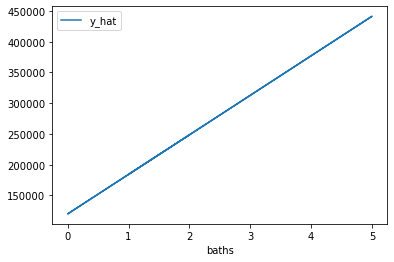

In [20]:
# ANSWER

house.plot(x = 'baths', y = 'y_hat')

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

<ipython-input-21-26e7c4e6d9fa>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().plot(house['baths'], house['y_hat'])


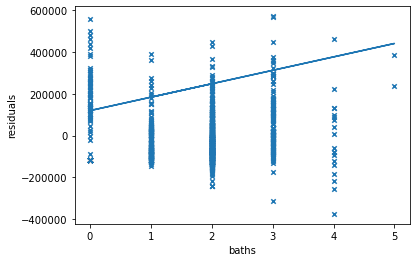

In [21]:
# ANSWER
import matplotlib.pyplot as plt

house.plot(x = 'baths', y = 'residuals', kind = 'scatter', marker = 'x')
plt.axes().plot(house['baths'], house['y_hat'])

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [22]:
# ANSWER

y_hat(2)

248509.82512901677



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



